## DESCRIPTION

IBM is an American MNC operating in around 170 countries with major business vertical as computing, software, and hardware.
Attrition is a major risk to service-providing organizations where trained and experienced people are the assets of the company. The organization would like to identify the factors which influence the attrition of employees.

Problem Statement : Build up the model to predict which employees are likely to attire.


In [1]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# read the data
emp_data = pd.read_csv("IBM Attrition Data.csv ")

In [3]:
# View first 5 records
emp_data.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [5]:
emp_data.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.721769,2.728571,6502.931293,2.693197,2.761224,7.008163
std,9.135373,8.106864,1.024165,1.093082,1.102846,4707.956783,2.498009,0.706476,6.126525
min,18.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,1.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,2.000000,2911.000000,1.000000,2.000000,3.000000
50%,36.000000,7.000000,3.000000,3.000000,3.000000,4919.000000,2.000000,3.000000,5.000000
75%,43.000000,14.000000,4.000000,4.000000,4.000000,8379.000000,4.000000,3.000000,9.000000
max,60.000000,29.000000,5.000000,4.000000,4.000000,19999.000000,9.000000,4.000000,40.000000


In [18]:
emp_data.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [6]:
emp_data.columns

Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')

## Exploratory data Analysis

In [4]:
# delete the null values
emp_data.dropna()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Research & Development,23,2,Medical,3,4,Married,2571,4,3,5
1466,39,No,Research & Development,6,1,Medical,4,1,Married,9991,4,3,7
1467,27,No,Research & Development,4,3,Life Sciences,2,2,Married,6142,1,3,6
1468,49,No,Sales,2,3,Medical,4,2,Married,5390,2,2,9


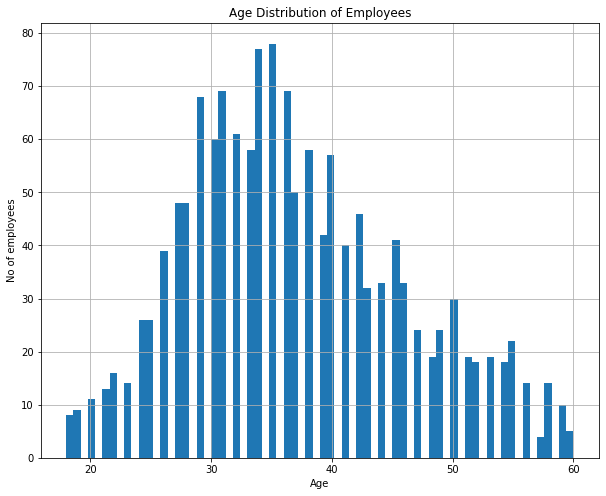

In [14]:
# plot the histogram
plt.figure(figsize=(10,8))
emp_data['Age'].hist(bins=70)
plt.title("Age Distribution of Employees")
plt.xlabel('Age')
plt.ylabel('No of employees')
plt.show()

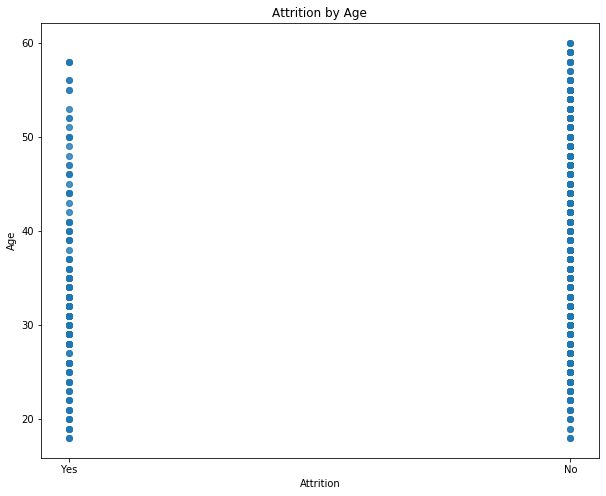

In [16]:
# Explore attrition by age
plt.figure(figsize =(10,8))
plt.scatter(emp_data.Attrition,emp_data.Age, alpha =0.55)
plt.title("Attrition by Age")
plt.xlabel('Attrition')
plt.ylabel('Age')
plt.show()

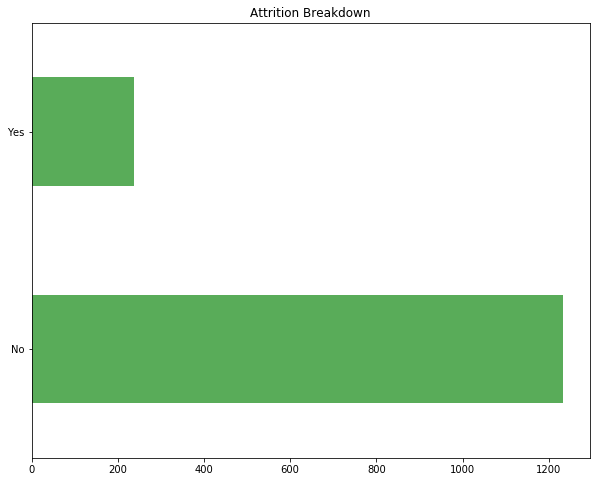

In [23]:
# explore data for left employees breakdown
plt.figure(figsize=(10,8))
emp_data.Attrition.value_counts().plot(kind = 'barh' ,color='green',alpha =0.65)
plt.title("Attrition Breakdown")
plt.show()

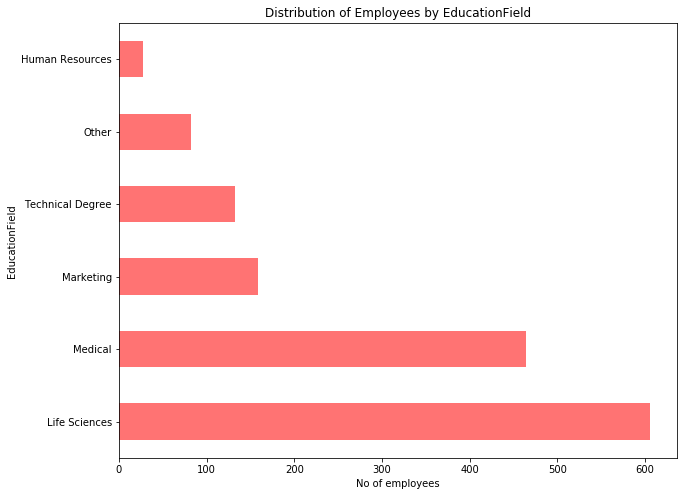

In [26]:
# find out the distribution of employees by the education field
plt.figure(figsize=(10,8))
emp_data.EducationField.value_counts().plot(kind='barh',color='red',alpha=0.55)
plt.title('Distribution of Employees by EducationField')
plt.xlabel('No of employees')
plt.ylabel('EducationField')
plt.show()


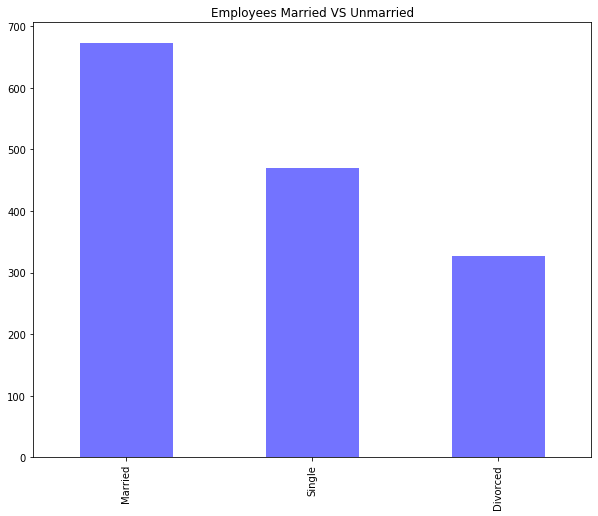

In [28]:
# No of married and unmarried employees
plt.figure(figsize=(10,8))
emp_data.MaritalStatus.value_counts().plot(kind='bar',color='blue',alpha=0.55)
plt.title('Employees Married VS Unmarried')
plt.show()

In [29]:
emp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
Age                        1470 non-null int64
Attrition                  1470 non-null object
Department                 1470 non-null object
DistanceFromHome           1470 non-null int64
Education                  1470 non-null int64
EducationField             1470 non-null object
EnvironmentSatisfaction    1470 non-null int64
JobSatisfaction            1470 non-null int64
MaritalStatus              1470 non-null object
MonthlyIncome              1470 non-null int64
NumCompaniesWorked         1470 non-null int64
WorkLifeBalance            1470 non-null int64
YearsAtCompany             1470 non-null int64
dtypes: int64(9), object(4)
memory usage: 149.4+ KB
